# Crustal Thickness Grids
**Description:**  Crustal thickness grids from various sources. 

**Dataset:** 

N.A.

**Associated papers:** 

An, Meijian, Douglas A. Wiens, Yue Zhao, Mei Feng, Andrew A. Nyblade, Masaki Kanao, Yuansheng Li, Alessia Maggi, and Jean-Jacques Lévêque. “S-Velocity Model and Inferred Moho Topography beneath the Antarctic Plate from Rayleigh Waves: Antarctic S-Velocities and Moho.” Journal of Geophysical Research: Solid Earth 120, no. 1 (2015): 359–83. https://doi.org/10.1002/2014JB011332.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions, utils

In [2]:
version_names = [
    "an-2015",
    # "shen-2018",
]

grids = []
for name in version_names:
    data = fetch.crustal_thickness(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)

In [3]:
_ = utils.get_grid_info(data, print_info=True)

grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: 6264.58496094
grid zmax: 65197.1328125
grid registration: g


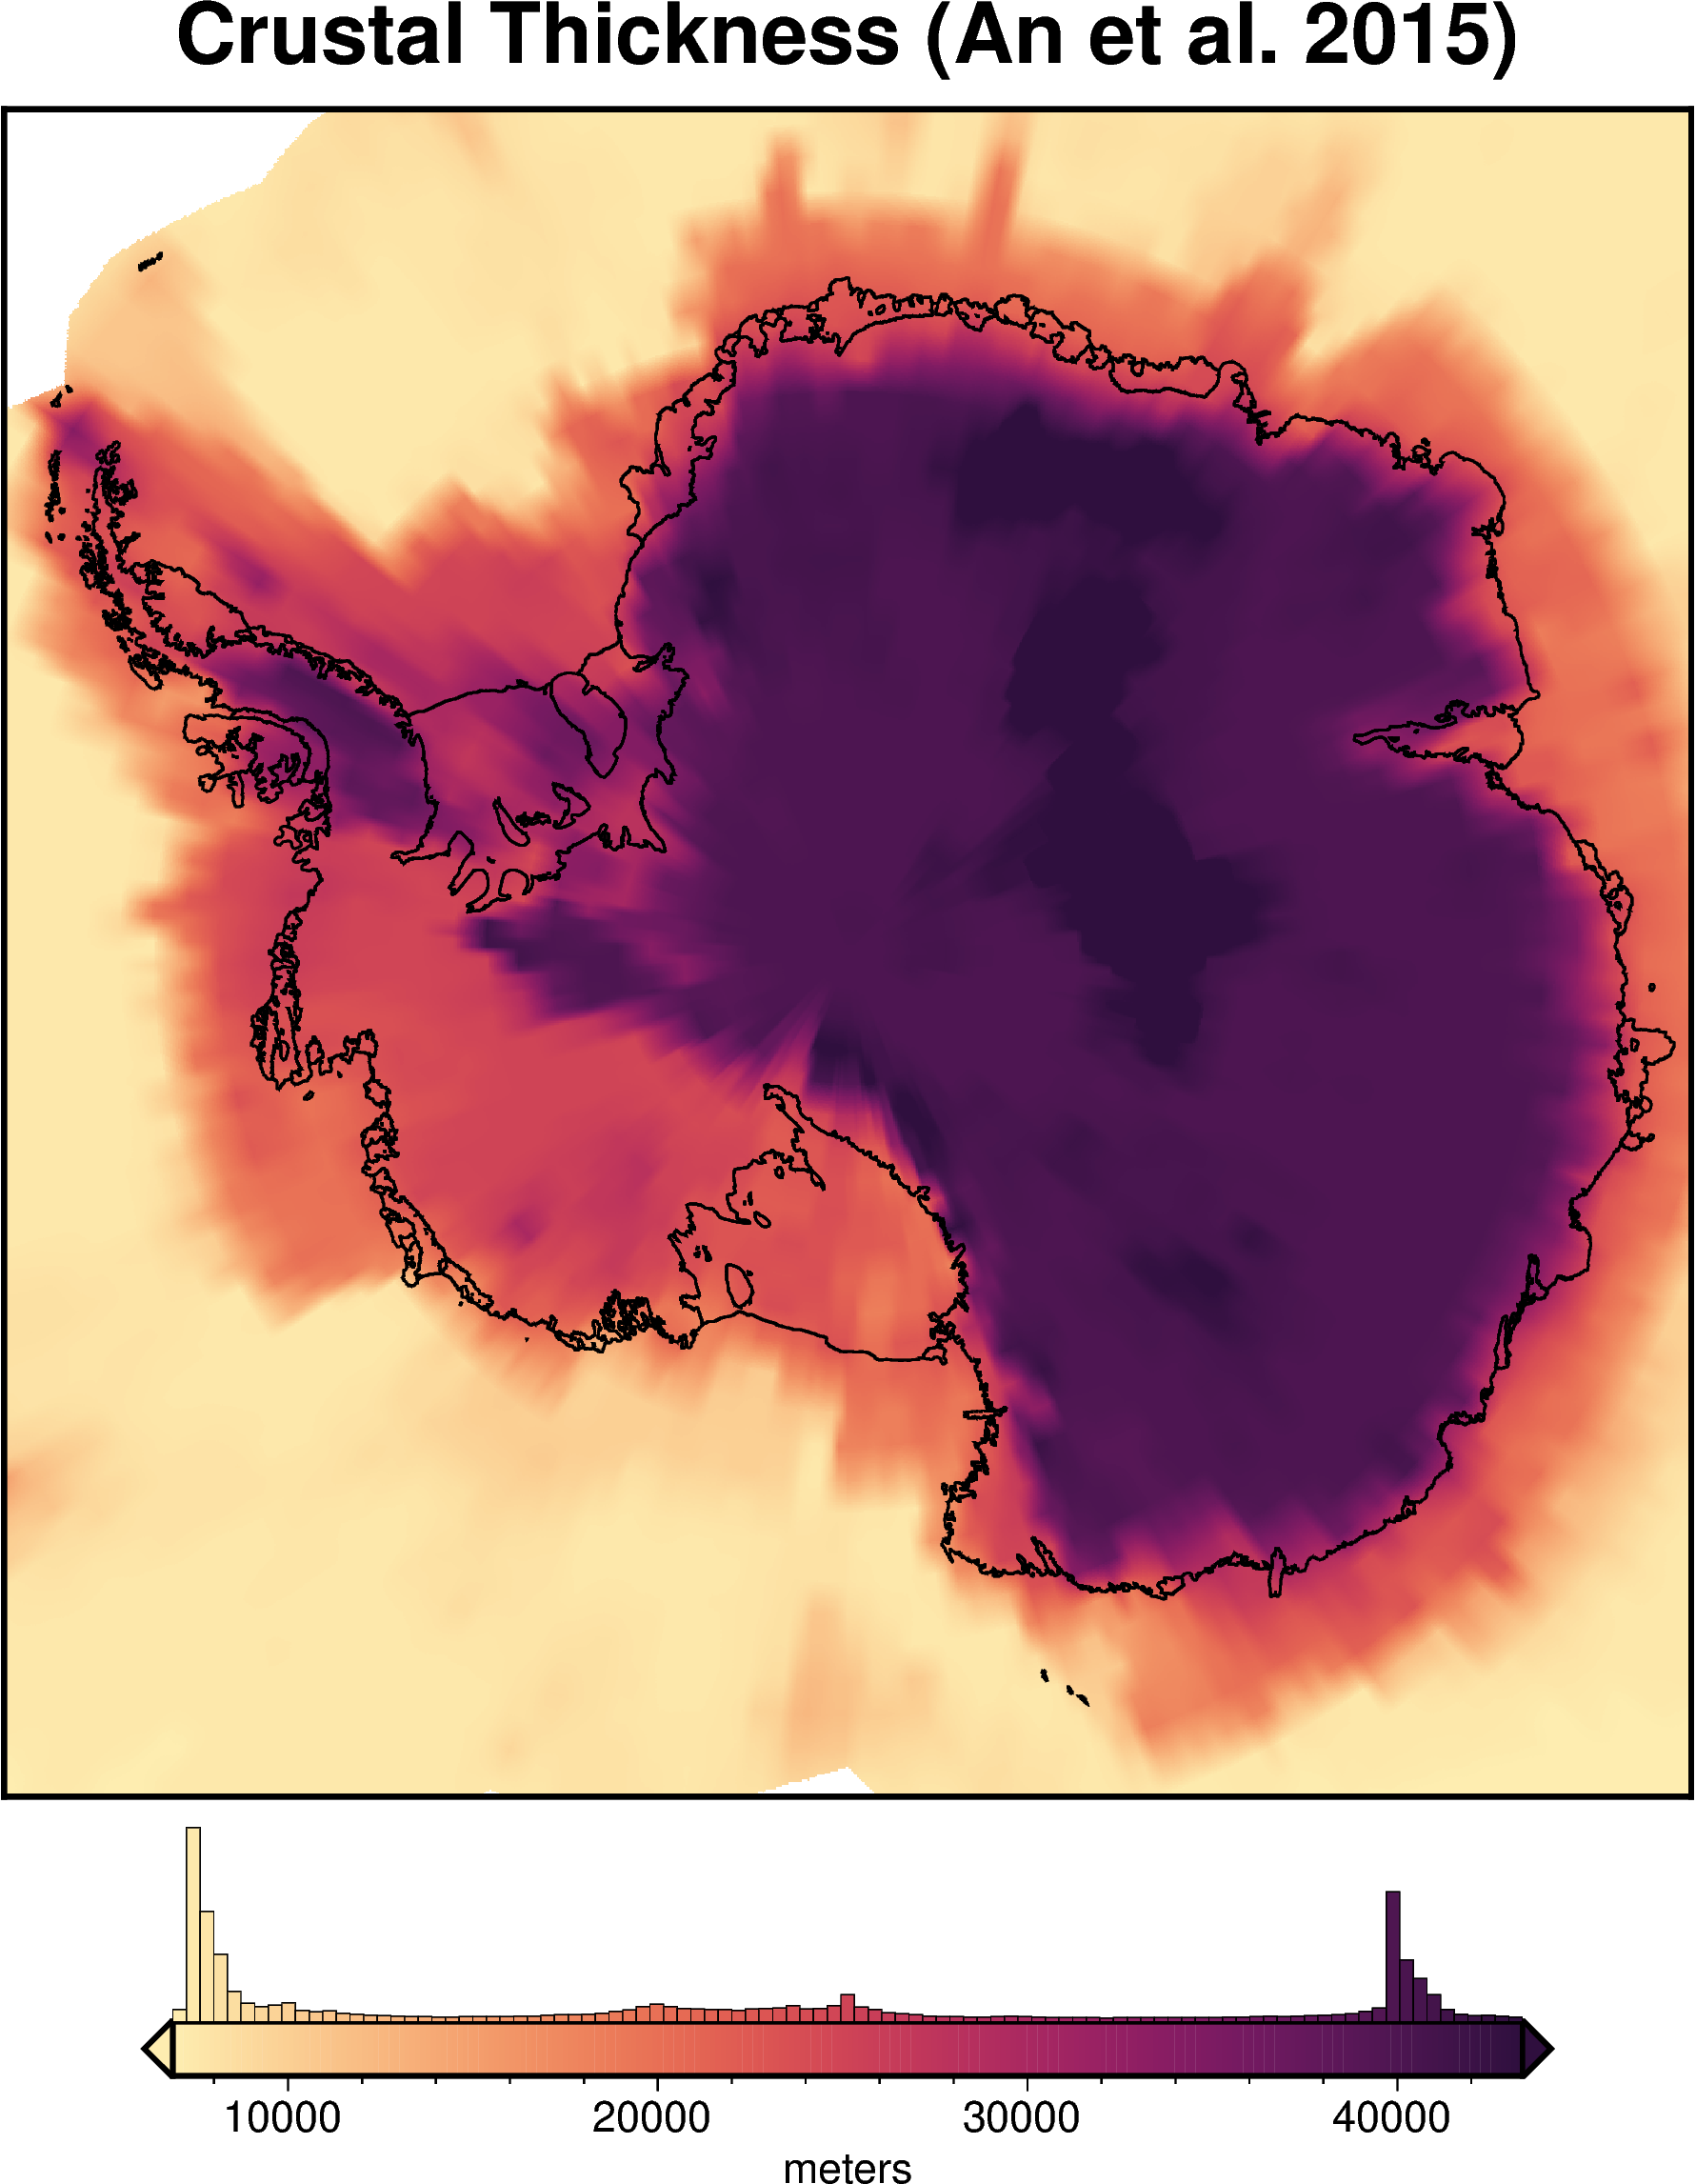

In [4]:
fig = maps.plot_grd(
    data,
    title="Crustal Thickness (An et al. 2015)",
    region=regions.antarctica,
    cbar_label="meters",
    coast=True,
    hist=True,
    robust=True,
    cmap="matter",
    hemisphere="south",
)

fig.show()